In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, timedelta


In [25]:
df_patient = pd.read_csv('./data_set/patient.csv')

In [26]:
df_patient.head()

,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [27]:
daily_count = df_patient.groupby('confirmed_date').patient_id.count()
daily_count = pd.DataFrame(daily_count)
data = daily_count.cumsum()
data.head()

,patient_id
confirmed_date,
2020-01-20,1
2020-01-24,2
2020-01-26,3
2020-01-27,4
2020-01-30,7


In [28]:
dataset = data.iloc[14:]
dataset.head()

,patient_id
confirmed_date,
2020-02-18,38
2020-02-19,65
2020-02-20,103
2020-02-21,203
2020-02-22,432


In [29]:
# Future forcasting
days_in_future = 3
dates = pd.date_range('2020-2-18','2020-3-10')
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
# future_forcast #3일을 추가해서 = 47일까지 미래 3일의 그래프를 그려본다.

days = np.array([i for i in range(len(dates))]).reshape(-1, 1) # index -> ndarray
data = np.array(dataset).reshape(-1, 1) # count->ndarray

In [30]:
days

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21]])

In [31]:
data

array([[  38],
       [  65],
       [ 103],
       [ 203],
       [ 432],
       [ 601],
       [ 832],
       [ 975],
       [1262],
       [1766],
       [2337],
       [3149],
       [4211],
       [4811],
       [5327],
       [5765],
       [6283],
       [6766],
       [7133],
       [7381],
       [7512],
       [7754]], dtype=int64)

In [32]:
kernel = ['linear', 'rbf']
c = [0.01, 0.1, 1, 10, 100]
gamma = [ 0.001, 0.01, 0.1, 10]
epsilon = [0.01, 0.1, 1, 10, 100]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
svm = SVR()
svm_search = GridSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=5, return_train_score=True, n_jobs=-1,verbose=1)

# 모델 fitting 전에 train, test 를 나눠서 해봤으나, 현재 데이터셋이 너무 범위가 작아 확진자증가를 반영하지 못해. 전체 데이터셋으로 fitting 함.
svm_search.fit(days, data)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    3.0s finished
C:\Users\kt347\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.

C:\Users\kt347\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'epsilon': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 10],
                         'kernel': ['linear', 'rbf'],
                         'shrinking': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=1)

In [33]:
svm_search.best_params_

{'C': 100,
 'epsilon': 100,
 'gamma': 0.001,
 'kernel': 'linear',
 'shrinking': False}

In [34]:
svm_search.best_estimator_

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=100, gamma=0.001,
    kernel='linear', max_iter=-1, shrinking=False, tol=0.001, verbose=False)

In [35]:
svm_pred = svm_search.best_estimator_.predict(future_forcast)
svm_pred

array([-1242.875,  -794.25 ,  -345.625,   103.   ,   551.625,  1000.25 ,
        1448.875,  1897.5  ,  2346.125,  2794.75 ,  3243.375,  3692.   ,
        4140.625,  4589.25 ,  5037.875,  5486.5  ,  5935.125,  6383.75 ,
        6832.375,  7281.   ,  7729.625,  8178.25 ,  8626.875,  9075.5  ,
        9524.125])

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

linear_model = LinearRegression(fit_intercept=False, normalize=True)
linear_model.fit(days, data)
linear_pred = linear_model.predict(future_forcast)
linear_model.coef_

array([[354.21745696]])

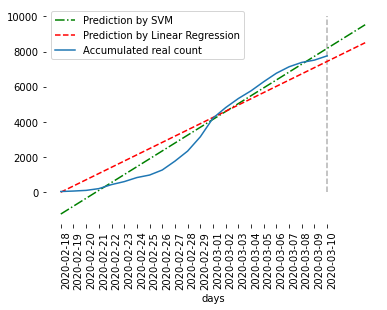

In [37]:
plt.plot(svm_pred, color='green', ls='-.', label = 'Prediction by SVM')
plt.plot(linear_pred, color='red', ls='--', label='Prediction by Linear Regression')
plt.plot(dataset, label='Accumulated real count')
plt.xlabel('days')
plt.vlines(x=21, ymin=0, ymax=10000, alpha=0.3, linestyles='--')
plt.xticks(rotation=90, ha='left')
plt.legend()
plt.box(False)

In [23]:
import statsmodels.api as sm

lm= sm.OLS(data,days)
results =lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                              526.7
Date:                Thu, 12 Mar 2020   Prob (F-statistic):                    2.36e-16
Time:                        00:02:53   Log-Likelihood:                         -180.07
No. Observations:                  22   AIC:                                      362.1
Df Residuals:                      21   BIC:                                      363.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           354.2175     15.435     22.949      0.000     322.119     386.316
==============================================================================
Omnibus:                       10.374   Durbin-Watson:                   0.083
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                2.207
Skew:                          -0.151   Prob(JB):                        0.332
Kurtosis:                       1.478   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""